In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itis9-16/iris9_16/009R_3.png
/kaggle/input/itis9-16/iris9_16/015L_3.png
/kaggle/input/itis9-16/iris9_16/012L_3.png
/kaggle/input/itis9-16/iris9_16/014L_1.png
/kaggle/input/itis9-16/iris9_16/011L_2.png
/kaggle/input/itis9-16/iris9_16/013L_2.png
/kaggle/input/itis9-16/iris9_16/016R_1.png
/kaggle/input/itis9-16/iris9_16/015R_3.png
/kaggle/input/itis9-16/iris9_16/011L_3.png
/kaggle/input/itis9-16/iris9_16/014R_1.png
/kaggle/input/itis9-16/iris9_16/010R_3.png
/kaggle/input/itis9-16/iris9_16/016R_2.png
/kaggle/input/itis9-16/iris9_16/009L_3.png
/kaggle/input/itis9-16/iris9_16/010L_1.png
/kaggle/input/itis9-16/iris9_16/013R_2.png
/kaggle/input/itis9-16/iris9_16/012R_2.png
/kaggle/input/itis9-16/iris9_16/012L_1.png
/kaggle/input/itis9-16/iris9_16/011L_1.png
/kaggle/input/itis9-16/iris9_16/015L_2.png
/kaggle/input/itis9-16/iris9_16/011R_3.png
/kaggle/input/itis9-16/iris9_16/012R_1.png
/kaggle/input/itis9-16/iris9_16/009R_2.png
/kaggle/input/itis9-16/iris9_16/010R_2.png
/kaggle/inp

In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [3]:
eyes_images_file = glob('/kaggle/input/iris1-8/*.png')
print(eyes_images_file)

['/kaggle/input/iris1-8/001R_3.png', '/kaggle/input/iris1-8/001L_3.png', '/kaggle/input/iris1-8/008L_3.png', '/kaggle/input/iris1-8/007R_2.png', '/kaggle/input/iris1-8/008R_2.png', '/kaggle/input/iris1-8/003R_1.png', '/kaggle/input/iris1-8/005R_1.png', '/kaggle/input/iris1-8/002L_2.png', '/kaggle/input/iris1-8/008L_2.png', '/kaggle/input/iris1-8/005R_3.png', '/kaggle/input/iris1-8/002L_1.png', '/kaggle/input/iris1-8/007R_3.png', '/kaggle/input/iris1-8/007L_2.png', '/kaggle/input/iris1-8/001L_1.png', '/kaggle/input/iris1-8/008L_1.png', '/kaggle/input/iris1-8/004R_1.png', '/kaggle/input/iris1-8/004L_1.png', '/kaggle/input/iris1-8/002L_3.png', '/kaggle/input/iris1-8/008R_1.png', '/kaggle/input/iris1-8/005R_2.png', '/kaggle/input/iris1-8/004R_2.png', '/kaggle/input/iris1-8/003R_3.png', '/kaggle/input/iris1-8/001L_2.png', '/kaggle/input/iris1-8/004L_3.png', '/kaggle/input/iris1-8/008R_3.png', '/kaggle/input/iris1-8/005L_2.png', '/kaggle/input/iris1-8/005L_3.png', '/kaggle/input/iris1-8/007L

In [4]:
img_cv2 = cv2.imread('/kaggle/input/iris1-8/001R_1.png')
img_cv2.shape

(576, 768, 3)

In [5]:
print(img_cv2.flatten())

[0 0 0 ... 0 0 0]


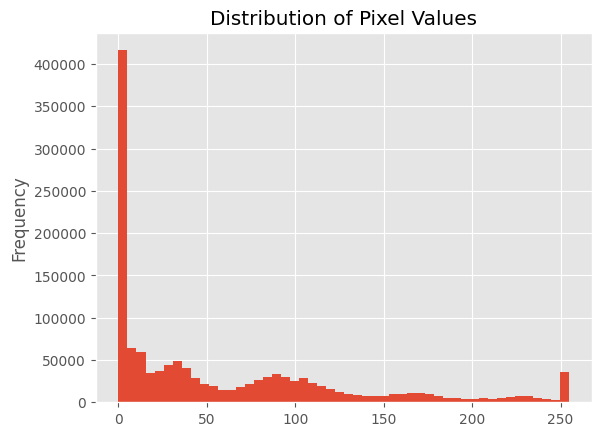

In [6]:
pd.Series(img_cv2.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

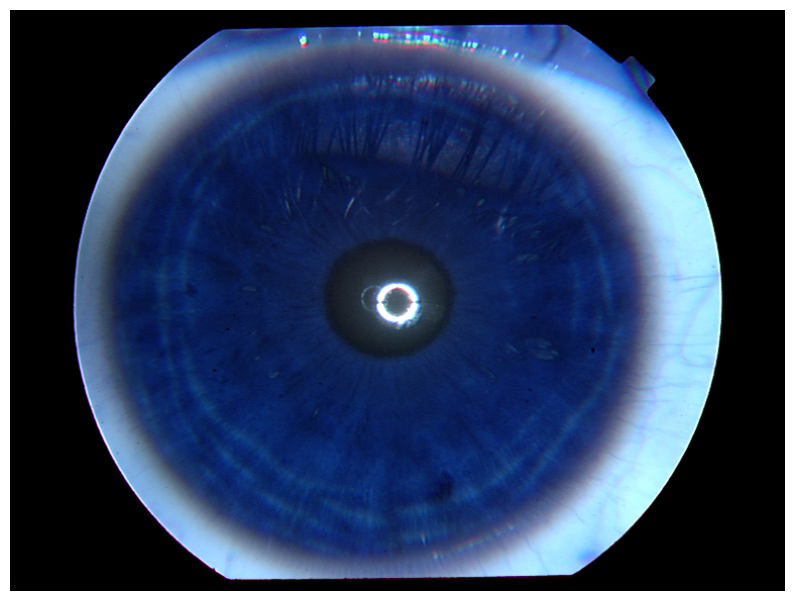

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_cv2)
ax.axis('off')
plt.show()

In [8]:
def extract_sift_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

In [9]:
# Define the path pattern to the images
dataset_path = '/kaggle/input/iris1-8/*.png'

In [10]:
image_files = glob(dataset_path)
print(image_files)

['/kaggle/input/iris1-8/001R_3.png', '/kaggle/input/iris1-8/001L_3.png', '/kaggle/input/iris1-8/008L_3.png', '/kaggle/input/iris1-8/007R_2.png', '/kaggle/input/iris1-8/008R_2.png', '/kaggle/input/iris1-8/003R_1.png', '/kaggle/input/iris1-8/005R_1.png', '/kaggle/input/iris1-8/002L_2.png', '/kaggle/input/iris1-8/008L_2.png', '/kaggle/input/iris1-8/005R_3.png', '/kaggle/input/iris1-8/002L_1.png', '/kaggle/input/iris1-8/007R_3.png', '/kaggle/input/iris1-8/007L_2.png', '/kaggle/input/iris1-8/001L_1.png', '/kaggle/input/iris1-8/008L_1.png', '/kaggle/input/iris1-8/004R_1.png', '/kaggle/input/iris1-8/004L_1.png', '/kaggle/input/iris1-8/002L_3.png', '/kaggle/input/iris1-8/008R_1.png', '/kaggle/input/iris1-8/005R_2.png', '/kaggle/input/iris1-8/004R_2.png', '/kaggle/input/iris1-8/003R_3.png', '/kaggle/input/iris1-8/001L_2.png', '/kaggle/input/iris1-8/004L_3.png', '/kaggle/input/iris1-8/008R_3.png', '/kaggle/input/iris1-8/005L_2.png', '/kaggle/input/iris1-8/005L_3.png', '/kaggle/input/iris1-8/007L

In [11]:
all_descriptors = []
X = []
for img_file in image_files:
    image = cv2.imread(img_file)
    # Extract SIFT features from the image
    keypoints, descriptors = extract_sift_features(image)
#     X.append(descriptors)
    # Append the descriptors to the list
    all_descriptors.append(descriptors)

structured_array = np.array(all_descriptors, dtype=object)
print(structured_array)
np.save('/kaggle/working/sift_features.npy', structured_array)

[array([[ 0.,  0.,  0., ..., 13.,  1.,  2.],
        [84.,  3.,  0., ..., 14.,  3.,  0.],
        [53.,  0.,  0., ...,  3.,  0.,  0.],
        ...,
        [62.,  3.,  0., ...,  2.,  1.,  0.],
        [ 1.,  0.,  0., ...,  1.,  0.,  0.],
        [59.,  0.,  0., ...,  5., 10.,  1.]], dtype=float32)
 array([[ 1.,  0.,  0., ...,  7.,  0.,  1.],
        [55.,  0.,  0., ..., 15.,  4.,  0.],
        [65.,  0.,  0., ...,  5.,  3.,  1.],
        ...,
        [50.,  2.,  0., ...,  1.,  1.,  5.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [47.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
 array([[40.,  0.,  0., ...,  3.,  1.,  5.],
        [ 1.,  0.,  0., ...,  4.,  0.,  0.],
        [79., 10.,  0., ...,  5.,  1.,  1.],
        ...,
        [ 1.,  0.,  0., ...,  4.,  0.,  1.],
        [ 1.,  0.,  0., ...,  4.,  0.,  3.],
        [61.,  0.,  0., ...,  1.,  0.,  1.]], dtype=float32)
 array([[73.,  2.,  0., ...,  2.,  1.,  2.],
        [88., 10.,  0., ...,  4.,  2.,  1.],
        [60.,

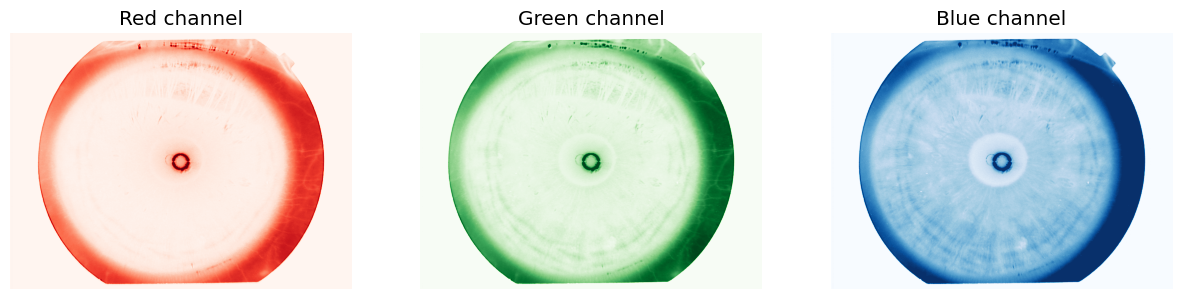

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_cv2[:,:,0], cmap='Reds')
axs[1].imshow(img_cv2[:,:,1], cmap='Greens')
axs[2].imshow(img_cv2[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

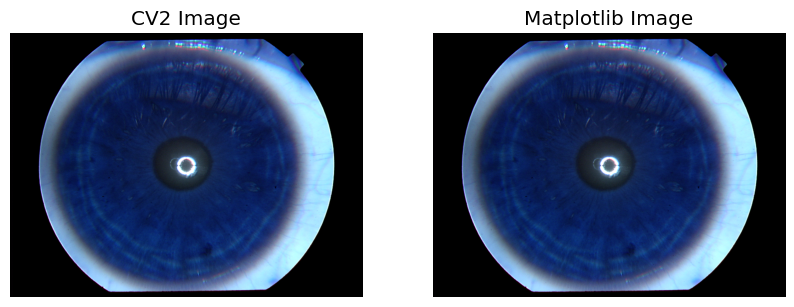

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_cv2)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

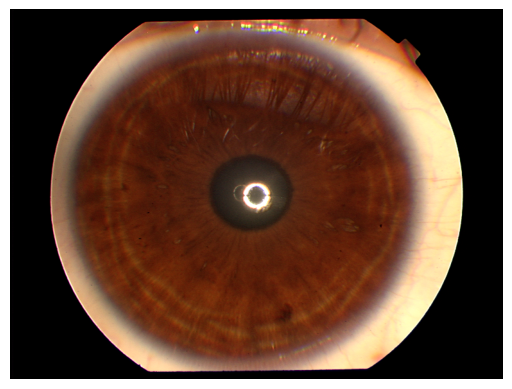

In [14]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Preprocess the new image (resize, normalize, etc.)
# Replace 'new_image.jpg' with the filename of your new image
new_image = cv2.imread('/kaggle/input/iris1-8/001L_1.png')
# Apply the same preprocessing steps as used for training data
# ...

In [15]:
descriptors_new=[]
def extract_sift_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoint, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

keypoints, descriptors = extract_sift_features(new_image)
descriptors_new.append(descriptors)
descriptors_new = np.array(descriptors_new, dtype=object)

print(descriptors_new)

[[[2.0 0.0 0.0 ... 5.0 0.0 1.0]
  [60.0 1.0 0.0 ... 4.0 0.0 1.0]
  [58.0 1.0 0.0 ... 6.0 1.0 1.0]
  ...
  [1.0 0.0 0.0 ... 2.0 1.0 6.0]
  [35.0 0.0 0.0 ... 0.0 0.0 1.0]
  [54.0 4.0 0.0 ... 3.0 2.0 0.0]]]


In [16]:
testing_descriptor = [np.array(descriptors_new)]
print(testing_descriptor)


[array([[[2.0, 0.0, 0.0, ..., 5.0, 0.0, 1.0],
        [60.0, 1.0, 0.0, ..., 4.0, 0.0, 1.0],
        [58.0, 1.0, 0.0, ..., 6.0, 1.0, 1.0],
        ...,
        [1.0, 0.0, 0.0, ..., 2.0, 1.0, 6.0],
        [35.0, 0.0, 0.0, ..., 0.0, 0.0, 1.0],
        [54.0, 4.0, 0.0, ..., 3.0, 2.0, 0.0]]], dtype=object)]


In [17]:


# Calculate Euclidean distance between the testing descriptor and each descriptor in the dataset
euclidean_distances = [np.linalg.norm(testing_descriptor - descriptor) for descriptor in descriptors_new]

# Calculate similarity scores between the testing descriptor and each descriptor in the dataset
similarities = [1 / (1 + distance) for distance in euclidean_distances]

# Find the index of the closest descriptor using Euclidean distance
closest_index_euclidean = np.argmin(euclidean_distances)
closest_descriptor_euclidean = descriptors_new[closest_index_euclidean]

# Find the index of the closest descriptor using similarity score
closest_index_similarity = np.argmax(similarities)
closest_descriptor_similarity = descriptors_new[closest_index_similarity]

print("Closest descriptor using Euclidean distance:", closest_descriptor_euclidean)
print("Closest descriptor using similarity score:", closest_descriptor_similarity)

Closest descriptor using Euclidean distance: [[2.0 0.0 0.0 ... 5.0 0.0 1.0]
 [60.0 1.0 0.0 ... 4.0 0.0 1.0]
 [58.0 1.0 0.0 ... 6.0 1.0 1.0]
 ...
 [1.0 0.0 0.0 ... 2.0 1.0 6.0]
 [35.0 0.0 0.0 ... 0.0 0.0 1.0]
 [54.0 4.0 0.0 ... 3.0 2.0 0.0]]
Closest descriptor using similarity score: [[2.0 0.0 0.0 ... 5.0 0.0 1.0]
 [60.0 1.0 0.0 ... 4.0 0.0 1.0]
 [58.0 1.0 0.0 ... 6.0 1.0 1.0]
 ...
 [1.0 0.0 0.0 ... 2.0 1.0 6.0]
 [35.0 0.0 0.0 ... 0.0 0.0 1.0]
 [54.0 4.0 0.0 ... 3.0 2.0 0.0]]


In [18]:
closest_index_similarity = np.argmax(similarities)
closest_descriptor_similarity = descriptors_new[closest_index_similarity]

In [19]:
# Retrieve the corresponding image from the dataset based on the index
closest_image_path = image_files[closest_index_similarity]

# Load the closest image from the dataset
closest_image = cv2.imread(closest_image_path)

print("Closest descriptor using similarity score:", closest_descriptor_similarity)
print("Path of the closest image:", closest_image_path)

Closest descriptor using similarity score: [[2.0 0.0 0.0 ... 5.0 0.0 1.0]
 [60.0 1.0 0.0 ... 4.0 0.0 1.0]
 [58.0 1.0 0.0 ... 6.0 1.0 1.0]
 ...
 [1.0 0.0 0.0 ... 2.0 1.0 6.0]
 [35.0 0.0 0.0 ... 0.0 0.0 1.0]
 [54.0 4.0 0.0 ... 3.0 2.0 0.0]]
Path of the closest image: /kaggle/input/iris1-8/001R_3.png


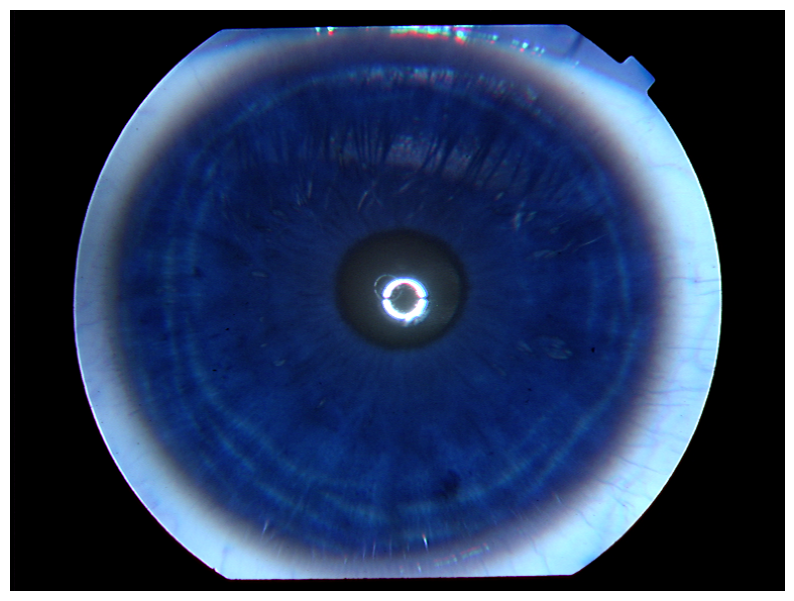

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(closest_image)
ax.axis('off')
plt.show()